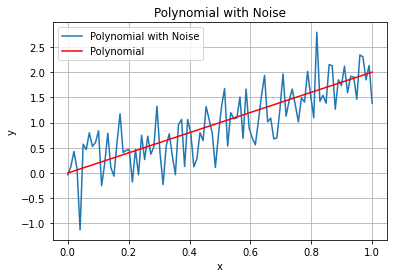

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def polyModelWithNoise(x,theta,sigma): 
    # Creates a polynomial f(x) for parameters theta which are subject to standard deviation sigma
    # y = theta0x + theta
    y  = np.polyval(theta,x)
    noise = np.random.normal(0,sigma,len(x))
    y_noise = y + noise
    return(y_noise)
    
def polyModel(x,theta):
    y = np.polyval(theta,x)
    return(y)

#ploting the graph
x = np.linspace(0,1,100)
theta = np.array([2,0])
sigma = 0.5

fx_noise = polyModelWithNoise(x,theta,sigma)
fx = polyModel(x,theta)

plt.plot(x, fx_noise, label='Polynomial with Noise')
plt.plot(x, fx, color='red', label='Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Polynomial with Noise')
plt.show()

#Gradient function
def polyGradient(x,theta):
    #calcualtes the gradient of the function with respect to theta
    # y = theta0x + theta1
    # dy/dtheta = x^i + ... + x + 1
    if np.isscalar(x):
        x = np.array([x])
        
    grad = np.zeros([0,len(x)])
    for i in range(len(theta)):
        n = x**i
        grad = np.row_stack((n,grad)) 
        
    return(grad)

df_theta = polyGradient(x,theta)

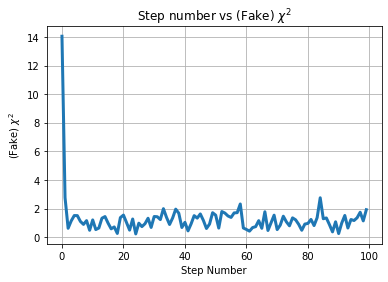

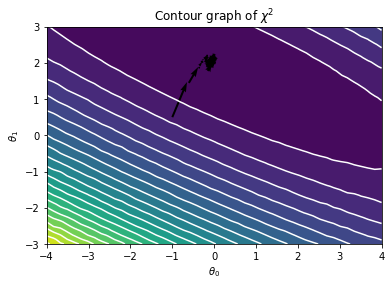

In [2]:
# Stochastic gradient descent with noise
true_theta = [2,0]

def get_2d_chisquared(theta0Vals,theta1Vals,numSamples):
    #Calculates Chi squared value for inputtbale array of theta paramaters
    N0=len(theta0Vals)  
    N1=len(theta1Vals)  
    output=np.zeros((N0,N1)) # 2D array for output values
    for j0 in range(N0): 
        for j1 in range(N1): 
            theta=np.array([theta0Vals[j0],theta1Vals[j1]])  # Temp theta array
            x=(np.random.rand(numSamples)) # Get numSamples random numbers between 0 and 1
            output[j0,j1]= np.average(((polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma))/sigma)**2) #Calculates the fake chi-squared value
    return(output)

#Set paramaters
numSteps=100
theta=[-1,0.5] #Starting postition
eta=0.5 #Step size
chiSqArray=np.zeros(numSteps) #Base array
thetaArray=np.zeros((numSteps+1,len(theta))) #Forms row stacks theta vals for each step
thetaArray[0]=theta #Starting step

for i in range(numSteps): #Loop over i from 0 to numSteps-1
    x=(np.random.rand(10)) # Generate 10 random samples 
    chiSq=np.average(((polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma))/sigma)**2)
    chiSqArray[i]=chiSq
    #Work out difference to true function
    deviation=polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma)
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta  
    
#Step number vs chisquared
fig, ax = plt.subplots() 
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_title("Step number vs (Fake) $\chi^2$")
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
plt.grid(True)
    
#Map of fake chi-squared value for a range of theta values with descent
theta0Vals=np.linspace(-4,4,50) 
theta1Vals=np.linspace(-3,3,50)
chi2=get_2d_chisquared(theta0Vals,theta1Vals,10000) #Generate the fake chi-squared map with 10000 random samples per point
X,Y=np.meshgrid(theta0Vals,theta1Vals,indexing='ij')
nlevels=20 # Number of levels (white lines on plot) 
fig, ax = plt.subplots() 
ax.set_title("Contour graph of $\chi^2$")
ax.contourf(X,Y,chi2,nlevels) #Plot filled contours (colour map below)
ax.contour(X,Y,chi2,nlevels,colors="white") #Plot line contours (white lines below)
ax.set_xlabel(r"$\theta_0$") #Label the axis
ax.set_ylabel(r"$\theta_1$") #Label the axis
ax.quiver(thetaArray[:-1,0], thetaArray[:-1,1], thetaArray[1:,0]-thetaArray[:-1,0], thetaArray[1:,1]-thetaArray[:-1,1], scale_units='xy',scale=1)

<ipython-input-3-0350ab7e8cd2>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fits = np.array([theta1,theta3,theta7])


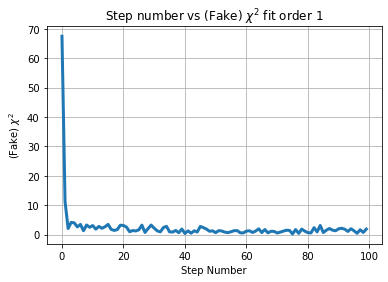

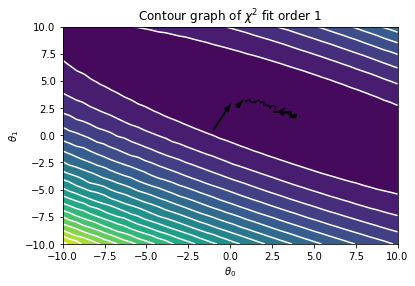

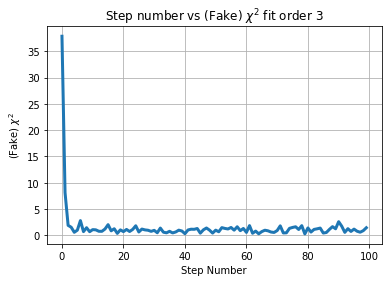

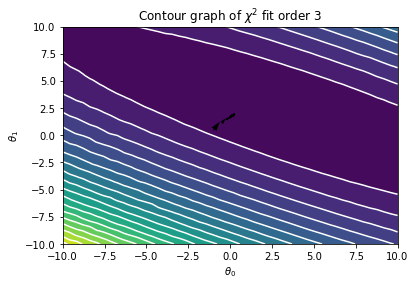

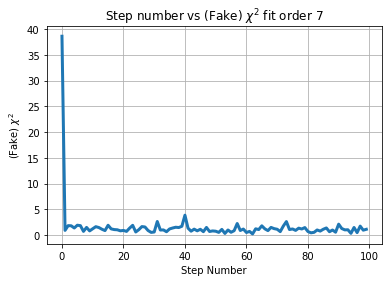

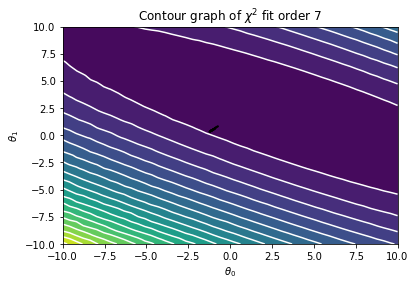

In [3]:
#Set paramaters nth order fits
true_theta = [0,2,2,2]
numSteps=100
theta1 = np.array([-1,0.5]) #Starting postition
theta3 = np.array([-1,0.5,0.5,0.5])
theta7 = np.array([-1,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
fits = np.array([theta1,theta3,theta7])

for j in range(3): 
    order = [1,3,7]
    theta = fits[j]
    eta=0.5 #Step size
    chiSqArray=np.zeros(numSteps) #Base array
    thetaArray=np.zeros((numSteps+1,len(theta))) #Forms row stacks theta vals for each step
    thetaArray[0]=theta #Starting step

    for i in range(numSteps): #Loop over i from 0 to numSteps-1

        x=(np.random.rand(10)) # Generate 10 random samples 
        chiSq=np.average(((polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma))/sigma)**2)
        chiSqArray[i]=chiSq
        #Work out difference to true function
        deviation=polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma)
        #Now work out where do go next
        theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
        thetaArray[i+1]=theta   
    
    #Step number vs chisquared
    fig, ax = plt.subplots()
    count=np.arange(numSteps+1)  #The integers from 0 up to num steps
    ax.plot(count[:-1],chiSqArray,linewidth=3)
    ax.set_title(f"Step number vs (Fake) $\chi^2$ fit order {order[j]}")
    ax.set_xlabel("Step Number")
    ax.set_ylabel(r"(Fake) $\chi^2$")
    plt.grid(True)

    #Map of fake chi-squared value for a range of theta values with descent
    theta0Vals=np.linspace(-10,10,50) 
    theta1Vals=np.linspace(-10,10,50)
    chi2=get_2d_chisquared(theta0Vals,theta1Vals,10000) #Generate the fake chi-squared map with 10000 random samples per point
    X,Y=np.meshgrid(theta0Vals,theta1Vals,indexing='ij')
    nlevels=20 # Number of levels (white lines on plot) 
    fig, ax = plt.subplots() 
    ax.set_title(f"Contour graph of $\chi^2$ fit order {order[j]}")
    ax.contourf(X,Y,chi2,nlevels) #Plot filled contours (colour map below)
    ax.contour(X,Y,chi2,nlevels,colors="white") #Plot line contours (white lines below)
    ax.set_xlabel(r"$\theta_0$") #Label the axis
    ax.set_ylabel(r"$\theta_1$") #Label the axis
    ax.quiver(thetaArray[:-1,0], thetaArray[:-1,1], thetaArray[1:,0]-thetaArray[:-1,0], thetaArray[1:,1]-thetaArray[:-1,1], scale_units='xy',scale=1)

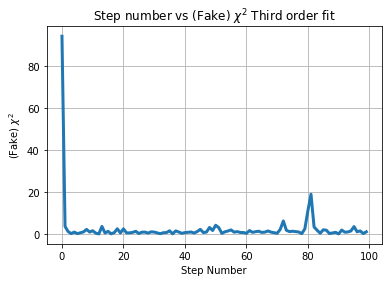

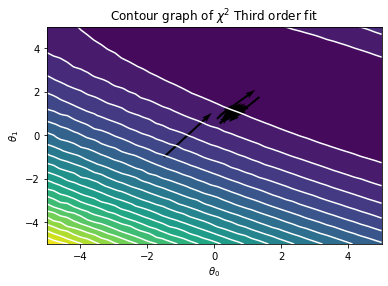

In [4]:
#Expanding paramaters of x for third order fit

#Set paramaters
numSteps=100
theta=[-1.5,-1,0.5,0.5] #Starting postition
eta=0.5 #Step size
chiSqArray=np.zeros(numSteps) #Base array
thetaArray=np.zeros((numSteps+1,len(theta))) #Forms row stacks theta vals for each step
thetaArray[0]=theta #Starting step


for i in range(numSteps): #Loop over i from 0 to numSteps-1
    x=(np.random.uniform(-0.5,1.5,10)) # Generate 10 random samples 
    chiSq=np.average(((polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma))/sigma)**2)
    chiSqArray[i]=chiSq
    #Work out difference to true function
    deviation=polyModel(x,theta)-polyModelWithNoise(x,true_theta,sigma)
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta  
    
#Step number vs chisquared
fig, ax = plt.subplots() 
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_title("Step number vs (Fake) $\chi^2$ Third order fit")
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
plt.grid(True)
    
#Map of fake chi-squared value for a range of theta values with descent
theta0Vals=np.linspace(-5,5,50) 
theta1Vals=np.linspace(-5,5,50)
chi2=get_2d_chisquared(theta0Vals,theta1Vals,10000) #Generate the fake chi-squared map with 10000 random samples per point
X,Y=np.meshgrid(theta0Vals,theta1Vals,indexing='ij')
nlevels=20 # Number of levels (white lines on plot) 
fig, ax = plt.subplots() 
ax.set_title("Contour graph of $\chi^2$ Third order fit")
ax.contourf(X,Y,chi2,nlevels) #Plot filled contours (colour map below)
ax.contour(X,Y,chi2,nlevels,colors="white") #Plot line contours (white lines below)
ax.set_xlabel(r"$\theta_0$") #Label the axis
ax.set_ylabel(r"$\theta_1$") #Label the axis
ax.quiver(thetaArray[:-1,0], thetaArray[:-1,1], thetaArray[1:,0]-thetaArray[:-1,0], thetaArray[1:,1]-thetaArray[:-1,1], scale_units='xy',scale=1)

The higher order the fit more precise the descent but the iteration takes longer
Higher order fit approximated better for complex noise function

When outside of trained range 0 to 1 descent did not adapt well as seen in above graph.
fit went to and from optimal chi squared values and looks like it could not find a minimum.